In [1]:
!pip install schemdraw


In [97]:
import schemdraw
import schemdraw.elements as elm
from schemdraw import logic
from ipywidgets import widgets, HBox
from IPython.display import display, clear_output

CMOS - Complementary Metal Oxide Semiconductor

NOT Gate CMOS

In [86]:
a= widgets.RadioButtons(
    options=[0, 1],
    description='A',
    disabled=False
)

def radio_eventhandler(obj):
    clear_output()
    display(a)
    new_val = obj['new']
    display(logic.Not().label(f'A={new_val}', loc='left').label('$\overline{A}$='+f'{1-int(new_val)}', loc='right'))


display(a)
display(logic.Not().label(f'A={0}', loc='left').label('$\overline{A}$='+f'{1}', loc='right'))

a.observe(radio_eventhandler, names='value')


RadioButtons(description='A', options=(0, 1), value=0)

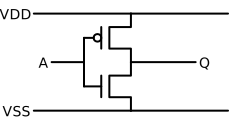

In [87]:
d = schemdraw.Drawing()
nfet = d.add(elm.NFet().left())
d.push()
d.add(elm.Line().left().at(nfet.drain).label('VSS', loc='left'))  #VDD
d.add(elm.Line().right().at(nfet.drain))
d.pop()
pfet = d.add(elm.PFet())
d.add(elm.Line().right().at(pfet.drain)) #VSS
d.add(elm.Line().left().at(pfet.drain).label('VDD', loc='left'))
d.add(elm.Line().length(2).right().at(nfet.source).label('Q', loc='right')) #Q
d.add(elm.Line().length(0.75).down().at(pfet.gate))
d.push()
d.add(elm.Line().length(1).left().label('A', loc='left')) #A
d.pop()
d.add(elm.Line().length(0.75).down())
d.draw()

AND Gate CMOS

In [99]:
def radio_eventhandler_a(obj):
    clear_output()
    display(a_b)
    new_val = obj['new']
    display(logic.And().label(f'A={new_val}', loc='in1').label(f'B={b.value}', loc='in2').label(f'A&B = {new_val*b.value}', loc='right'))

def radio_eventhandler_b(obj):
    clear_output()
    display(a_b)
    new_val = obj['new']
    display(logic.And().label(f'A={a.value}', loc='in1').label(f'B={new_val}', loc='in2').label(f'A&B = {a.value*new_val}', loc='right'))

a= widgets.RadioButtons(
    options=[0, 1],
    description='A',
    disabled=False
)
b= widgets.RadioButtons(
    options=[0, 1],
    description='B',
    disabled=False
)
a_b = HBox([a, b])
display(a_b)
display(logic.And().label(f'A={a.value}', loc='in1').label(f'B={b.value}', loc='in2').label(f'A&B = {a.value*b.value}', loc='right'))
a.observe(radio_eventhandler_a, names='value')
b.observe(radio_eventhandler_b, names='value')
    
